  #### * 변수 설명
    Survived (생존 여부): 0이면 사망, 1이면 생존을 나타냅니다.
    Pclass (승객 등급): 1, 2, 3 등급으로 분류됩니다.
    Name (이름): 승객의 이름입니다.
    Sex (성별): 남성 또는 여성입니다.
    Age (나이): 승객의 나이입니다.
    SibSp (동승한 형제자매/배우자 수): 승객과 함께 탑승한 형제자매 또는 배우자의 수입니다.
    Parch (동승한 부모/자녀 수): 승객과 함께 탑승한 부모 또는 자녀의 수입니다.
    Ticket (티켓 번호): 승객의 티켓 번호입니다.
    Fare (요금): 승객이 지불한 요금입니다.
    Cabin (객실 번호): 승객의 객실 번호입니다. (일부 데이터는 결측치로 채워져 있을 수 있음)
    Embarked (출발 항구): 승객이 탑승한 항구입니다. (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
# 작업 디렉터리를 설정
# os.chdir('/home/piai')
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc('axes', unicode_minus=False)

### 1. 데이터 불러오기 - titanic.csv

In [2]:
# titanic = pd.read_csv("./실습파일/BigData분석기초/titanic.csv", encoding = "euc-kr")
titanic = pd.read_csv("titanic.csv", encoding = "euc-kr")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. 데이터 특성 확인하기

- 총 891개의 데이터로, 총 12개의 변수를 갖는다.
- Cabin, Embarked 변수에서 결측값을 갖는 것으로 확인된다.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.758889,13.00257,0.42,22.0,30.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


#### 2-1. 결측치 확인하기

- Cabin과 Embarked 변수에서 결측값을 갖는 것으로 나타났다.
- Cabin에서는 687개의 결측값을 확인할 수 있고 Embarked에서는 2개의 결측값을 확인할 수 있다.

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2-2. 이상치 확인하기

In [7]:
for i in titanic.columns:
    print(i, ":", titanic[i].nunique(), "/", titanic[i].dtype)

PassengerId : 891 / int64
Survived : 2 / int64
Pclass : 3 / int64
Name : 891 / object
Sex : 2 / object
Age : 88 / float64
SibSp : 7 / int64
Parch : 7 / int64
Ticket : 681 / object
Fare : 248 / float64
Cabin : 147 / object
Embarked : 3 / object


In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.2.1 Age. Fare 변수 이상치 확인하기

* Age와 Fare 변수 모두 q3 + 1.5 * iqr 보다 커 이상치로 보이는 값들이 존재하나,  정상범위의 다른 값들의 Survived의 비와 차이가 없었다.  
  이에 따라 이상치로 판단하지 않고 지우지 않았다.
  

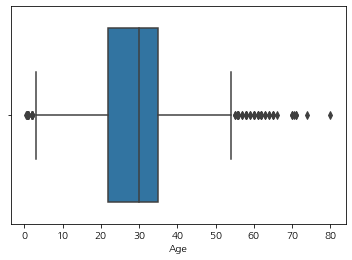

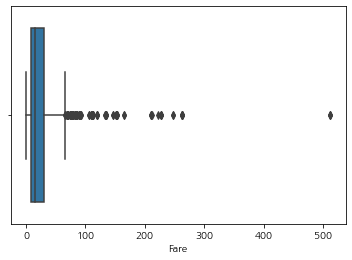

In [9]:
numeric_col=['Age', 'Fare']
category_col=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
for col in numeric_col:
    sns.boxplot(data=titanic, x=col)
    plt.show()

In [10]:
age_q1 = np.quantile(titanic['Age'], 0.25)
age_q3 = np.quantile(titanic['Fare'], 0.75)
age_iqr = (age_q3-age_q1)
titanic.loc[titanic['Age']> age_q3 + 1.5*age_iqr]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


In [11]:
fare_q1 = np.quantile(titanic['Fare'], 0.25)
fare_q3 = np.quantile(titanic['Fare'], 0.75)
fare_iqr = (fare_q3-fare_q1)
titanic.loc[titanic['Fare']> fare_q3 + 1.5*fare_iqr].sort_values('Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


### 3. 데이터전처리

#### 3.1 결측치 대체

#### - Embarked

- Embarked이 결측된 2개의 행은 같은 Ticket과 Fare, Cabin의 값을 갖는 것으로 확인된다.  
  이를 통해 두 명의 승객은 같은 장소에서 탑승(Embarked)했을 것으로 예상된다.
- 또한 Embarked의 파이차트에서 S의 비율이 가장 크고, 비슷한 이름의 객실들이 모두 S에서 탔다는 점에서 S로 대체하였다.

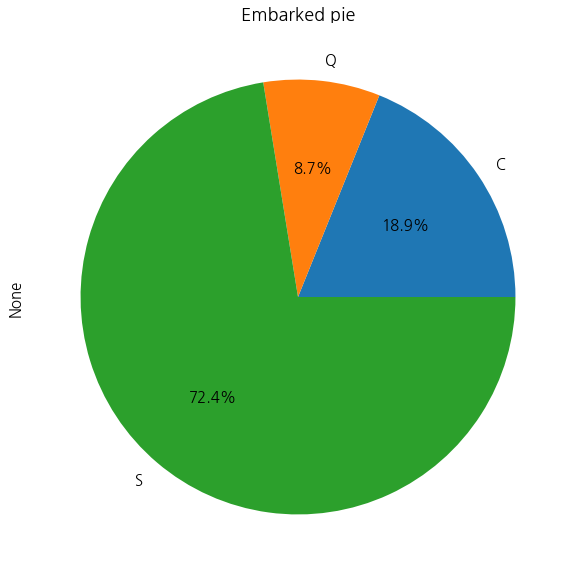

In [13]:
plt.figure(figsize=(15, 10))
embark=titanic.groupby('Embarked').size()
embark.plot.pie(y='Embarked', autopct="%.1f%%")
plt.title("Embarked pie")
plt.rcParams['font.size'] = 15
plt.show()

In [14]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
titanic[(titanic['Fare']>0) & (titanic['Cabin'].str.contains('B2'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0,B20,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0,B20,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
titanic['Embarked'].fillna('S', inplace = True)

#### - Cabin

- Cabin은 범주형 변수이기 떄문에 평균값으로 대치가 불가능하다. 또한 결측치를 제외한 나머지 값들의 비율을 확인하였을 때 그 값의 비율이 비교적 균등하고, 결측치의 수가 많아 결측치의 값들을 따로 'unknown'이라는 값을 갖게 하였다.

In [17]:
titanic['Cabin_first_name'] = titanic['Cabin'].str.get(i=0)

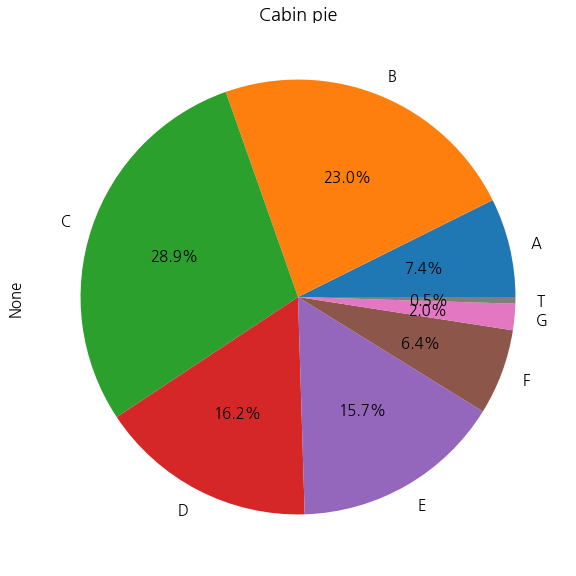

In [18]:
plt.figure(figsize=(15, 10))
embark=titanic.groupby('Cabin_first_name').size()
embark.plot.pie(y='Cabin_first_name', autopct="%.1f%%")
plt.title("Cabin pie")
plt.rcParams['font.size'] = 15
plt.show()

In [19]:
titanic['Cabin'].fillna('unknown', inplace=True)

In [20]:
titanic.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin                 0
Embarked              0
Cabin_first_name    687
dtype: int64

#### 3.2 이상치 대체
- 이상치는 대체하지 않음.

#### 3.3. 파생변수 생성
- 객실번호는 첫자리만 별도의 변수로 생성 : 변수['Cabin'].str.get(i=0) 사용
- 나이에 대한 파생변수 생성 : 14세이하 Child, 28세 이하 Young, 45세 이하 Middle, 56세 이하 Prime, 나머지 Old
- 가족수 계산 : 변수['Family'] = 변수['Parch'] + 변수["SibSp"]
- 요금 구간화 : 50이하 0, 100이하 1, 150이하 2, 200이하 3, 나머지 4 

In [21]:
titanic['Cabin_first_name'] = titanic['Cabin'].str.get(i=0)
titanic.loc[titanic['Cabin_first_name']=='u', 'Cabin_first_name']='unknown'
titanic['Cabin_first_name']

0      unknown
1            C
2      unknown
3            C
4      unknown
        ...   
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: Cabin_first_name, Length: 891, dtype: object

In [22]:
titanic['Agegroup'] = 'Old'
titanic.loc[(titanic['Age']<14), 'Agegroup'] ='Child'
titanic.loc[(titanic['Age']>=14) & (titanic['Age']<28), 'Agegroup'] ='Young'
titanic.loc[(titanic['Age']>=28) & (titanic['Age']<45), 'Agegroup'] ='Middle'
titanic.loc[(titanic['Age']<56) & (titanic['Age']>=45), 'Agegroup'] ='Prime'

In [23]:
titanic['Family'] = titanic['Parch'] + titanic['SibSp']
titanic['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [24]:
titanic['Faregroup'] = 4
titanic.loc[titanic['Fare']<50, 'Faregroup'] =1
titanic.loc[(titanic['Fare']>=50)&(titanic['Fare']<100), 'Faregroup'] =2
titanic.loc[(titanic['Fare']>=100) & (titanic['Fare']<150), 'Faregroup'] =3

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_first_name,Agegroup,Family,Faregroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,unknown,Young,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Middle,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,unknown,Young,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Middle,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,unknown,Middle,0,1


### 4. 그래프 분석

#### 4.1 목표변수의 countplot

- Survived 변수의 생존(1), 사망(0)의 수로 생존자보다 사망자가 150명 가량 많음을 알 수 있다.

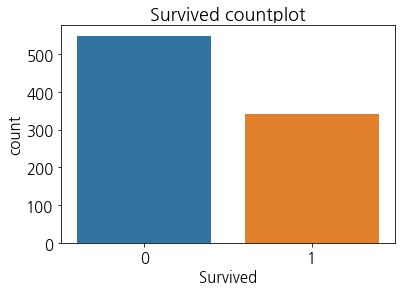

In [26]:
sns.countplot(data=titanic, x="Survived")
plt.rcParams['font.size'] = 15
plt.title('Survived countplot')
plt.show()

#### 4.2 목표변수의 파이차트

- 파이차트를 통해, 생존, 사망 비율을 나타냈으며 약 62대 38로 나타났다.

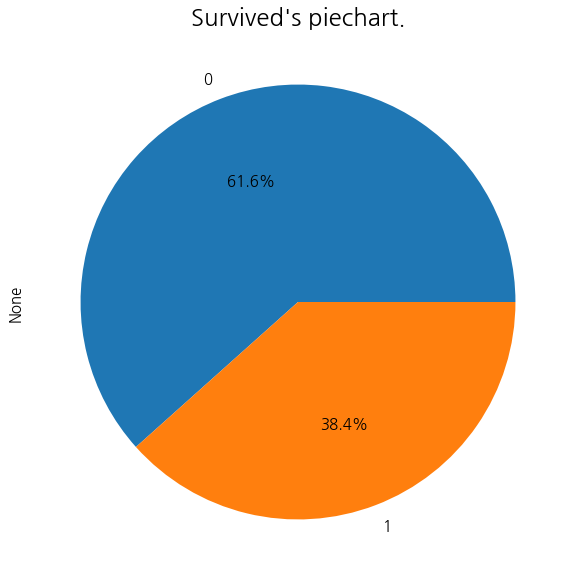

In [27]:
plt.figure(figsize=(15, 10))
count_survived=titanic.groupby('Survived').size()
count_survived.plot.pie(y='Survived', autopct="%.1f%%")
plt.rcParams['font.size'] = 20
plt.title("Survived's piechart.")
plt.show()

#### 4.3. 범주형 변수들의 파이차트

- Pclass는 1,2,3이 24, 20, 55의 비율로 나타났고, Sex는 남녀비율이 65:35로 나타났다.
- Embarked는 S,C,Q는 72.5:19:8.6의 비율로 나타났고, Agegroup는 middle, Youngdl 높은 것으로 확인되었으며 middle이 49%로 가장 높게 나왔다.
- Family는 혼자오는 사람이 60%로 가장 많았다. Faregroup는 150이하의 구간이 82%로 가장 높게 나왔다.

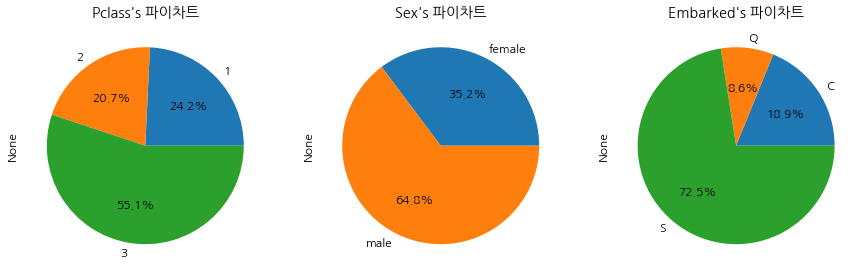

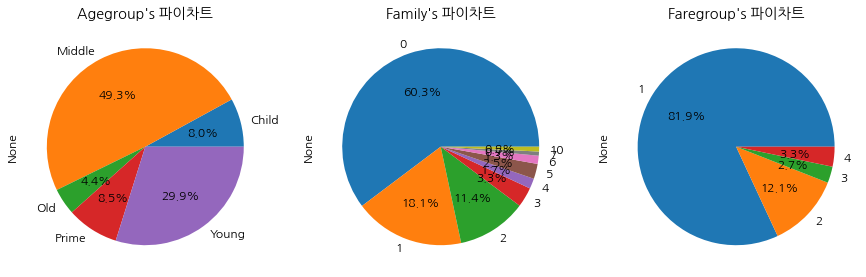

In [28]:
category_col1=['Pclass', 'Sex', 'Embarked']
category_col2=['Agegroup', 'Family', 'Faregroup']
plt.rcParams['font.size'] = 12

fig1, axes1 = plt.subplots(1, 3, figsize=(15, 10))
for ax, col in zip(axes1.ravel(), category_col1):
    
    count_survived = titanic.groupby(col).size()
    count_survived.plot.pie(ax=ax, autopct="%.1f%%")
    ax.set_title("{0}'s 파이차트".format(col)) 
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(15, 10))
for ax, col in zip(axes2.ravel(), category_col2):
     
    count_survived = titanic.groupby(col).size()
    count_survived.plot.pie(ax=ax, autopct="%.1f%%")
    ax.set_title("{0}'s 파이차트".format(col))   
plt.show()

#### 4.4.1 연속형 변수에 대한 분포 확인 : boxplot

- 연속형 변수 중 Age, Fare, Family 변수를 제외한 나머지의 연속형 변수는 boxplot 형태로 산포를 확인하기 어렵다. 따라서 Age, Fare, Family의 박스 플랏만을 형태를 그려보았다.
- Age와 Fare에서는 Q3 + 1.5* IQR보다 큰 값들이 존재하는 것으로 보이나, 이상치는 제거하지 않는다.

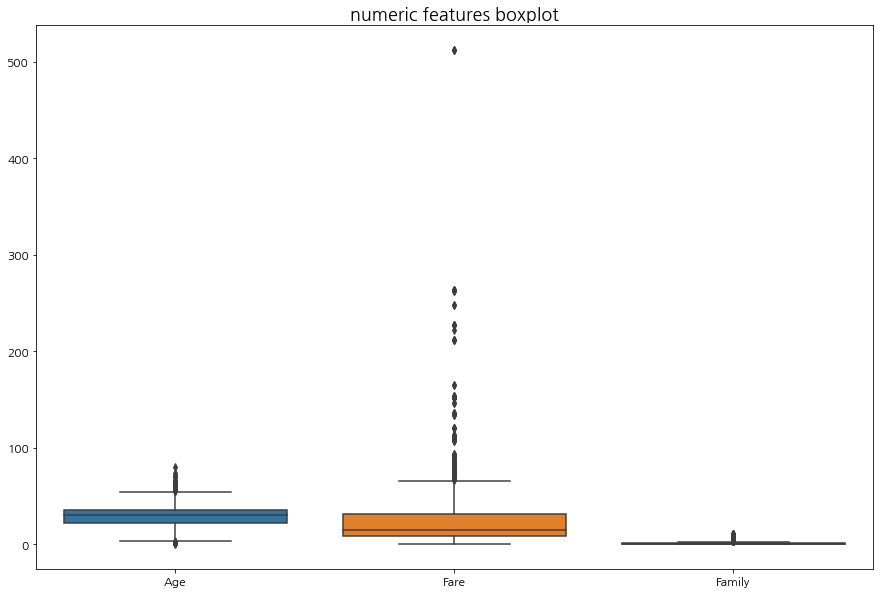

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=titanic[['Age', 'Fare', 'Family']])
plt.rcParams['font.size'] = 15
plt.title('numeric features boxplot')
plt.show()

#### 4.4.2 연속형 변수에 대한 분포 확인 : 히스토그램

- titanic의 데이터에서 연속형 변수인 Pclass, Age, SibSp, Parch, Fare, Family의 히스토그램을 살펴보았다.
- SibSp, Parch, Fare, Family의 하스토그램에서는 값이 증가할수록 count가 줄어드는 개형을 확인할 수 있었으며, Age 히스토그램에서는 30 초중반의 나이대가 가장 수가 많음을 볼 수 있었다.
- Pclass는 연속형 변수이지만 3개의 범주와 다름없기 때문에, barplot형태로 이해 가능하다.  1,2 class의 승객수는 비슷한 반면 3class는 압도적으로 많은 승객이 탑승했음을 알 수 있다.

In [30]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_first_name',
       'Agegroup', 'Family', 'Faregroup'],
      dtype='object')

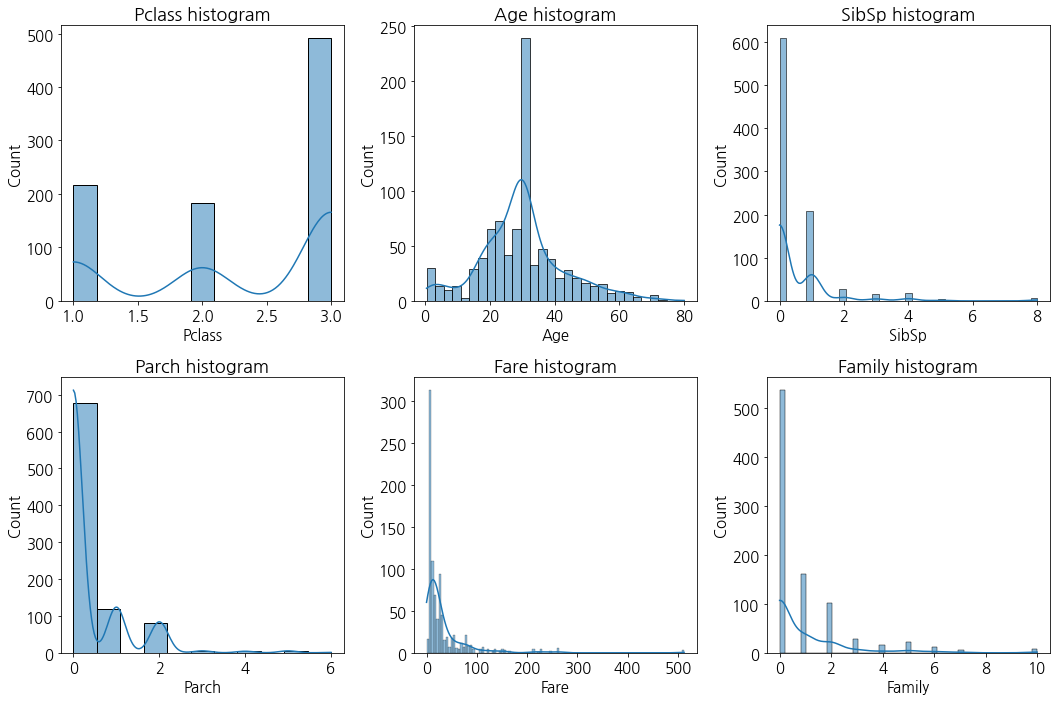

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_col=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.rcParams['font.size'] = 15

for ax, col in zip(axes.ravel(), numeric_col): 
    sns.histplot(titanic[col], kde=True, ax=ax)
    ax.set_title("{} histogram".format(col)) 

plt.tight_layout()
plt.show()